In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [18]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [56]:
results = session.query(measurement).all()
for row in results:
    print(row)

In [39]:
# The first row of measurement table
first = session.query(measurement).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2205b7ac280>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# last_12months = session.query(measurement.date).filter(measurement.date)
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the data and precipitation scores

x = session.query(measurement.prcp, measurement.date).filter(measurement.date >= one_year).all()
x
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(x, columns=['prcp', 'date'])
df
# Sort the dataframe by date

df_sort = df.sort_values('date')
df_sort
# Use Pandas Plotting with Matplotlib to plot the data


,prcp,date
0,0.00,2016-08-23
1009,NaN,2016-08-23
1529,1.79,2016-08-23
704,0.05,2016-08-23
361,0.15,2016-08-23
...,...,...
1527,0.00,2017-08-22
1008,0.00,2017-08-23
360,0.00,2017-08-23
1528,0.08,2017-08-23


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

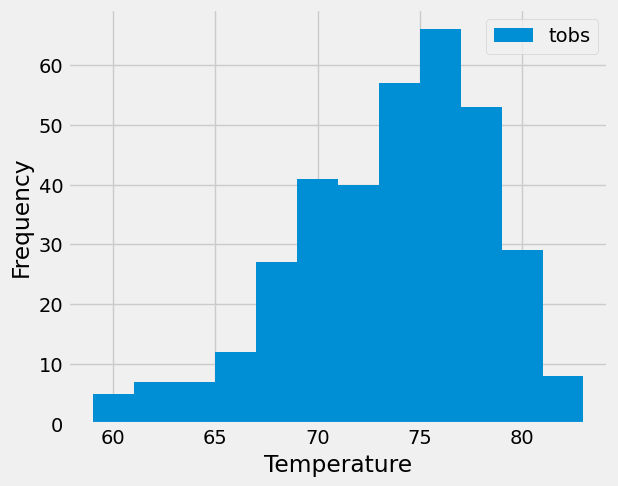

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()